<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
월          12 non-null int64
강수일수       12 non-null float64
평균기온(℃)    12 non-null float64
최저기온(℃)    12 non-null float64
최고기온(℃)    12 non-null float64
강수량(mm)    12 non-null float64
황사일수       12 non-null float64
폭염일수       12 non-null float64
체감온도       12 non-null float64
미세먼지       12 non-null int64
소비자물가지수    12 non-null float64
경복궁        12 non-null int64
dtypes: float64(9), int64(3)
memory usage: 1.2 KB
None
-77.08418170461653
기울기 a :  [-5.82424307e+03 -1.92122224e+04  1.60163213e+04  1.39981195e+04
 -1.91607410e+02 -5.81437152e+03 -1.09139364e-11  6.17609005e+02
 -2.18899360e+03  1.67762861e+04]
절편 b :  -1315714.1959006183


C:\anaconda\envs\test\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


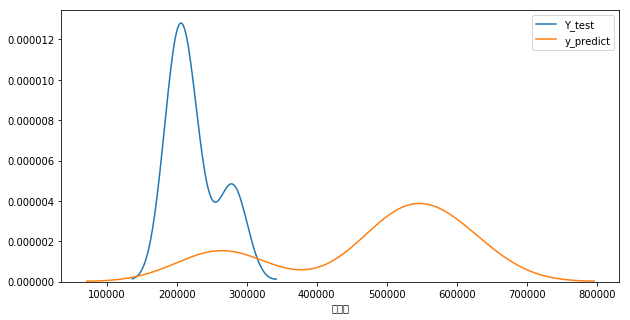

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1단계: 데이터 준비
df = pd.read_excel("c:/test/월별요인들.xlsx")
print(df.info()) 


# #3단계 : 분석에 사용할 특성(열, 변수) 선택 (연비, 실린더, 마력, 중력)
ndf = df[['강수일수','평균기온(℃)','최저기온(℃)','최고기온(℃)','강수량(mm)','황사일수','폭염일수','체감온도','미세먼지','소비자물가지수','경복궁']]



# 4단계 : 훈련 데이터와 테스트 데이터로 분리
X= ndf[['강수일수','평균기온(℃)','최저기온(℃)','최고기온(℃)','강수량(mm)','황사일수','폭염일수','체감온도','미세먼지','소비자물가지수']]   #독립변수 X : 무게
Y=ndf['경복궁']    #종속변수 Y : 연비


# train data 와 test data를 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤 추출값 10

#5단계 : 다중 회귀분석  
from sklearn.linear_model import LinearRegression  #선형회귀 라이브러리의 선형회귀분석 모듈 

lr = LinearRegression()  #단순 선형회귀분석 객체 생성

lr.fit(X_train, Y_train)  #학습 => 모델 생성

r_square = lr.score(X_test, Y_test) # 결정 계수 계산
print(r_square )    #결정 계수 :  

print('기울기 a : ', lr.coef_)
print('절편 b : ', lr.intercept_)

#기울기 a :  
# 절편 b :   

y_predict =lr.predict(X_test)   #독립변수에 대한 예측된 종속변수값 

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y_test, hist=False, label='Y_test')
ax2 = sns.distplot(y_predict, hist=False, label='y_predict', ax=ax1)
plt.show()
plt.close()

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1단계: 데이터 준비
df = pd.read_excel("c:/test/월별요인들.xlsx")
print(df.info()) 


# #3단계 : 분석에 사용할 특성(열, 변수) 선택 (연비, 실린더, 마력, 중력)
ndf = df[['강수일수','평균기온(℃)','최저기온(℃)','최고기온(℃)','강수량(mm)','황사일수','폭염일수','체감온도','미세먼지','소비자물가지수','경복궁']]


# 4단계 : 훈련 데이터와 테스트 데이터로 분리
X= ndf[['강수일수','평균기온(℃)','최저기온(℃)','최고기온(℃)','강수량(mm)','황사일수','폭염일수','체감온도','미세먼지','소비자물가지수']]   #독립변수 X : 무게
Y=ndf['경복궁']    #종속변수 Y : 연비


from sklearn.preprocessing import StandardScaler
#데이터 전처리 - 데이터 표준화 작업
scaler=StandardScaler()
scaler.fit(X.values)
x_scaled=scaler.transform(X.values)

#PCA 모델링
from sklearn.decomposition import PCA

pca_x=PCA()
pca_x.fit(x_scaled)

x_pca_x=pca_x.transform(x_scaled)

pca_x.components_

#히트맵 표현


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
월          12 non-null int64
강수일수       12 non-null float64
평균기온(℃)    12 non-null float64
최저기온(℃)    12 non-null float64
최고기온(℃)    12 non-null float64
강수량(mm)    12 non-null float64
황사일수       12 non-null float64
폭염일수       12 non-null float64
체감온도       12 non-null float64
미세먼지       12 non-null int64
소비자물가지수    12 non-null float64
경복궁        12 non-null int64
dtypes: float64(9), int64(3)
memory usage: 1.2 KB
None


array([[ 0.31852329,  0.36899403,  0.36659983,  0.3672075 ,  0.31879344,
        -0.08484809,  0.27408849,  0.36556269, -0.31131215,  0.28043761],
       [-0.1637604 ,  0.09645237,  0.04975151,  0.14272203,  0.26897519,
         0.80441075, -0.24891024,  0.05962474,  0.30595632,  0.24997936],
       [-0.49399051,  0.0525636 ,  0.0417782 ,  0.01271594, -0.13431374,
        -0.23020944, -0.52171488,  0.05589249, -0.40603683,  0.48999028],
       [ 0.01266413,  0.18573241,  0.26830821,  0.13191798,  0.25441865,
        -0.22623849, -0.59929597,  0.17002551,  0.17168294, -0.58523446],
       [-0.19187148, -0.12418472, -0.031131  , -0.16248878,  0.75022598,
        -0.35874754,  0.1176325 , -0.30052907,  0.2600597 ,  0.23888648],
       [ 0.70415398, -0.11776552, -0.2529839 , -0.10095047,  0.16157464,
         0.07821319, -0.43978371, -0.29424314, -0.27848331,  0.16229988],
       [ 0.30286885,  0.07638866,  0.18515416, -0.11419464, -0.33712229,
        -0.26889478, -0.14721704,  0.15559198

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
월          12 non-null int64
강수일수       12 non-null float64
평균기온(℃)    12 non-null float64
최저기온(℃)    12 non-null float64
최고기온(℃)    12 non-null float64
강수량(mm)    12 non-null float64
황사일수       12 non-null float64
폭염일수       12 non-null float64
체감온도       12 non-null float64
미세먼지       12 non-null int64
소비자물가지수    12 non-null float64
경복궁        12 non-null int64
dtypes: float64(9), int64(3)
memory usage: 1.2 KB
None


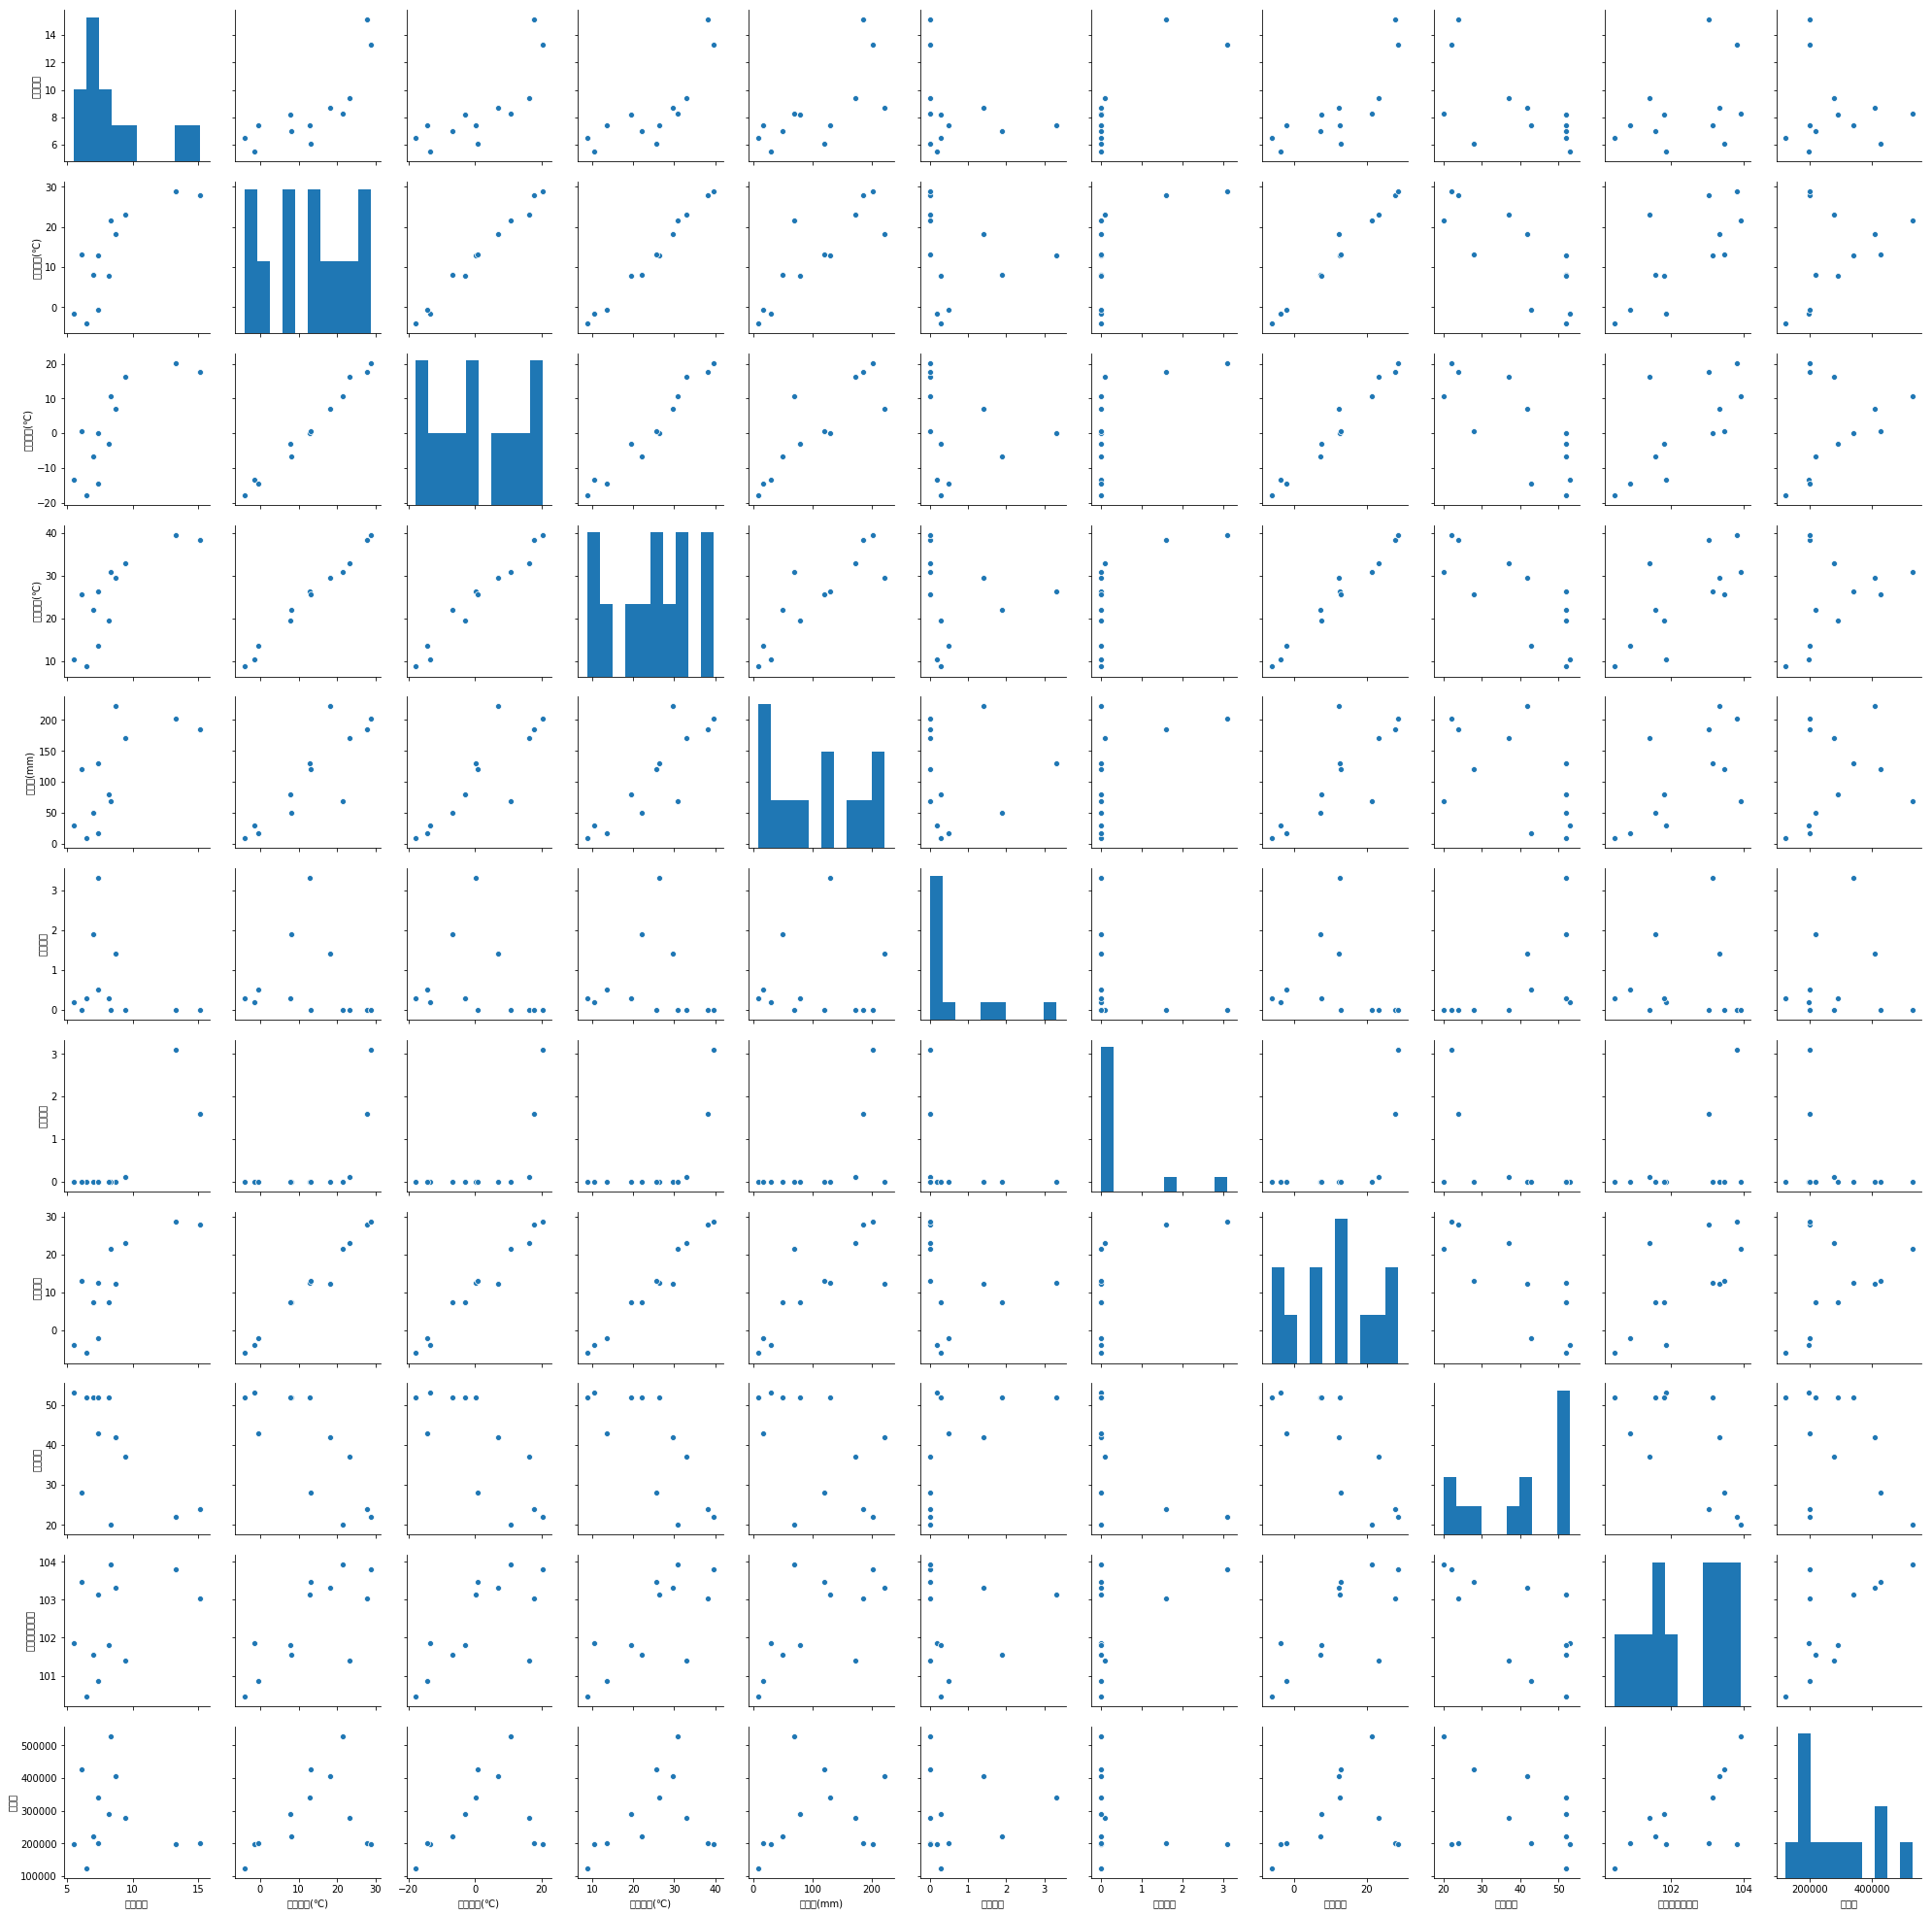

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1단계: 데이터 준비
df = pd.read_excel("c:/test/월별요인들.xlsx")
print(df.info()) 


# #3단계 : 분석에 사용할 특성(열, 변수) 선택 (연비, 실린더, 마력, 중력)
ndf = df[['강수일수','평균기온(℃)','최저기온(℃)','최고기온(℃)','강수량(mm)','황사일수','폭염일수','체감온도','미세먼지','소비자물가지수','경복궁']]


sns.pairplot(ndf,palette='husl')
plt.show()

